In [60]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier


In [61]:
df = pd.read_csv('/Users/arslanaliawan/Desktop/fake_or_real_news.csv')
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [62]:
df = df.set_index('Unnamed: 0')
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [63]:
y = df.label
y.head()

Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [64]:
df = df.drop('label', axis=1)
df.head()

,title,text
Unnamed: 0,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [65]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [66]:
X_train.head()

Unnamed: 0
8055                                                     
5656    Report Copyright Violation Do you think there ...
669     The election in 232 photos, 43 numbers and 131...
5630    Email Ever wonder what’s on the mind of today’...
9797    Wells Fargo is Rotting from the Top Down Wells...
Name: text, dtype: object

In [67]:
y_train.head()

Unnamed: 0
8055    FAKE
5656    FAKE
669     REAL
5630    FAKE
9797    FAKE
Name: label, dtype: object

In [76]:
#Now vectorization using Tf idf
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.7) 

tfidf_train = tfidf_vectorizer.fit_transform(X_train)

tfidf_test = tfidf_vectorizer.fit_transform(X_test)

In [69]:
print(tfidf_test)

  (0, 11849)	0.03773794933619255
  (0, 38897)	0.10376407273095176
  (0, 37979)	0.07313523418545718
  (0, 36636)	0.19558661683209408
  (0, 25802)	0.05720880429881599
  (0, 42136)	0.04677427745474409
  (0, 38127)	0.08444903550411556
  (0, 41312)	0.05152526473416443
  (0, 39121)	0.05158619693688736
  (0, 38175)	0.12945366065734817
  (0, 34798)	0.11060982650168111
  (0, 8039)	0.16837500311742387
  (0, 23704)	0.11492047135455545
  (0, 11961)	0.4596818854182218
  (0, 25778)	0.25890732131469635
  (0, 11899)	0.24903844706532474
  (0, 2198)	0.07169646566887715
  (0, 2824)	0.06179066482391172
  (0, 22394)	0.029864468223520974
  (0, 13122)	0.08262711750053513
  (0, 19196)	0.10184794259049586
  (0, 40666)	0.17912710566255244
  (0, 30547)	0.15085123529505337
  (0, 21954)	0.07894947426037997
  (0, 40996)	0.03851773802621703
  :	:
  (2090, 1757)	0.06813212879305311
  (2090, 3925)	0.058214521757998856
  (2090, 30647)	0.0655351091028167
  (2090, 40654)	0.06352070413286705
  (2090, 14124)	0.068132128793

In [77]:
#Vectorization using count

count_vectorization= CountVectorizer(stop_words='english',max_df =0.7)

count_train = count_vectorization.fit_transform(y_train)
count_test = count_vectorization.fit_transform(y_test)

In [78]:
print(count_test)

  (0, 1)	1
  (1, 0)	1
  (2, 1)	1
  (3, 1)	1
  (4, 1)	1
  (5, 0)	1
  (6, 0)	1
  (7, 1)	1
  (8, 1)	1
  (9, 1)	1
  (10, 0)	1
  (11, 1)	1
  (12, 1)	1
  (13, 0)	1
  (14, 1)	1
  (15, 1)	1
  (16, 0)	1
  (17, 0)	1
  (18, 0)	1
  (19, 0)	1
  (20, 1)	1
  (21, 0)	1
  (22, 0)	1
  (23, 1)	1
  (24, 1)	1
  :	:
  (2066, 1)	1
  (2067, 0)	1
  (2068, 1)	1
  (2069, 0)	1
  (2070, 1)	1
  (2071, 0)	1
  (2072, 0)	1
  (2073, 0)	1
  (2074, 0)	1
  (2075, 1)	1
  (2076, 1)	1
  (2077, 0)	1
  (2078, 0)	1
  (2079, 1)	1
  (2080, 0)	1
  (2081, 1)	1
  (2082, 1)	1
  (2083, 1)	1
  (2084, 0)	1
  (2085, 0)	1
  (2086, 1)	1
  (2087, 0)	1
  (2088, 1)	1
  (2089, 0)	1
  (2090, 1)	1


In [79]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   1.000
Confusion matrix, without normalization


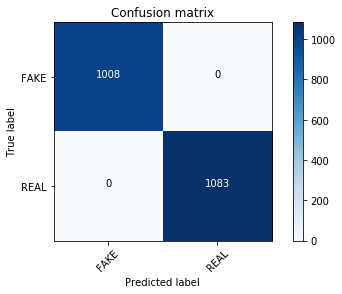

In [85]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])